In [1]:
import os
import sys
import seaborn as sns
pd = os.path.split(os.getcwd())[0]
if pd not in sys.path:
    sys.path.append(pd)

In [2]:
import matplotlib.pyplot as plt
from hypernets import *
import os
import numpy as np
from tensorflow import set_random_seed
set_random_seed(4)
from numpy.random import seed
from sklearn.preprocessing import  StandardScaler
seed(3)


/usr/pkg/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
# modes= ['basic', 'deep_implicit', 'bayes_by_gaussian_dropout']
# modes= ['deep_implicit','bayes_by_gaussian_dropout', 'basic','deepst_n_gaussian']
models = [ Hyper_Net_GAN,]
modes= ['dense',]
# models = [ Hyper_Net_WGAN,]

#

size=100
sample_size = 64
n_train = 500
left,right = 0, 30

MainNetInputDim = 5
xxx = np.linspace(left,right,500*MainNetInputDim).reshape((500,MainNetInputDim))
yyy= np.sin(xxx)

main_net_config ={}
main_net_config['units'] = [2,10,1]
main_net_config['activation'] = 'tanh'
main_net_config['output_activation'] = None

# num_hiddens = [8,]
num_hiddens = [3,5,8]

z_dims = [2,5,10,]
# z_dims = [10,]
n_points = 10
gan = None

In [39]:


def run(model_type, funct, mode, num_hidden, z_dim,x,y,points):
    g_out_dim = weights_dim(main_net_config['units'])
    g_h_dim= 10 * g_out_dim
    gan = model_type(main_net_config, g_input_dim= z_dim, g_num_hidden=num_hidden//2, g_hidden_dim=g_h_dim,
                        c_num_hidden=num_hidden, c_hidden_dim=g_out_dim*2//3, sample_size=sample_size, mode= mode)
    gan.sample_real = (lambda sample_size: np.random.multivariate_normal(mean=np.zeros(shape=(g_out_dim,)), cov=np.eye(g_out_dim), size=sample_size ))

    gan.build_model()
    directory = "./picture1/"+ str(funct) + "/"+ model_type.__name__+ "_" + mode + str(num_hidden)+"_"+str(z_dim)+"_"+str(points)+"_50_500"
    if not os.path.exists(directory):
        os.makedirs(directory)

    z = np.random.multivariate_normal(mean=np.zeros(shape=(z_dim,)), cov=np.eye(z_dim), size=size)
    z1 = np.random.multivariate_normal(mean=np.zeros(shape=(z_dim,)), cov=1.5*np.eye(z_dim), size=size)


    scaler = StandardScaler()
    x_= scaler.fit_transform(x)
    for iii in range(3):
        n_c_pretrain=20
        if iii == 0:
            n_c_pretrain=100
        gan.train(x_, y, n_train = n_train,  n_c_pretrain = n_c_pretrain ,n_c_train_perit = 20, n_c_train_perinterval = 50, c_train_interval = 300)
        xx = scaler.transform(xxx)
        t = gan.predict(xx, z)
        t1 = gan.predict(xx, z1)
        fig=plt.figure()
    #     plt.ylim(-2,2)
        plt.xlim(left,right)
        for i in range(size):
            plt.plot(xxx, t1[i, :], color='red', alpha=0.1)
            plt.plot(xxx,t[i,:],color='b', alpha=0.2)
        plt.plot(xxx,yyy, color='r')
        plt.plot(x,y, 'ro')
    #     plt.xlabel('GAN after {} epochs'.format((iii+1)*500))
    #     plt.legend((a,b),('fake', 'real'),scatterpoints=1,bbox_to_anchor=(1.35,.0),loc='lower right',fontsize=14)
        plt.savefig(directory+'/f_{0}.png'.format(iii+1))
    #     plt.show(block=True)
        fig.clf()
        plt.close()
    return gan



In [40]:

points = 100

x = np.random.uniform(left+10,right-10, points*MainNetInputDim).reshape((points, MainNetInputDim))  # np.linspace(-1,10,6).reshape((6,1))
y = np.sin(x)
num_hidden = 3
z_dim = 2
mode = 'deep_implicit'
model_type = Hyper_Net_GAN
funct = 1
gan =run(model_type, funct, mode, num_hidden, z_dim,x,y,points)



  0%|          | 0/500 [00:00<?, ?it/s]


ValueError: Error when checking input: expected net_in to have shape (None, 2) but got array with shape (100, 5)

['loss', 'C_freezed_loss', 'M_loss']
[3.0210536 4.3267703 6.7090473 ... 1.2624588 1.2747995 1.2747663]


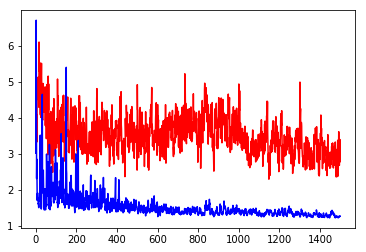

In [37]:
import matplotlib.pyplot as plt
# print(gan.performance_log)
print(gan.gan_model_tg.metrics_names)
history =np.array( gan.performance_log['generator'])
print(history[:,2])
plt.plot(history[:,1],'r')
plt.plot(history[:,2],'b')

['loss', 'C_freezed_loss', 'M_loss']
[ 3.2147264 21.03781    3.1253726 ...  1.1964155  1.1939614  1.1235427]


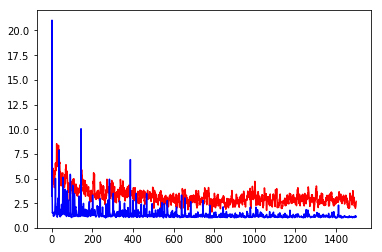

In [18]:
import matplotlib.pyplot as plt
# print(gan.performance_log)
print(gan.gan_model_tg.metrics_names)
history =np.array( gan.performance_log['generator'])
print(history[:,2])
plt.plot(history[:,1],'r')
plt.plot(history[:,2],'b')

In [ ]:

for points in range(5,n_points):
    for funct in range(10):
        x = np.random.uniform(left+10,right-10, points).reshape((points, 1))  # np.linspace(-1,10,6).reshape((6,1))
        y = np.sin(x)
        for num_hidden in num_hiddens:
            for z_dim in z_dims:
                for mode in modes:
                            for model_type in models:
                                run(model_type, funct, mode, num_hidden, z_dim,x,y,points)
                                print("==")

